All Rows and Columns of the Unemployment Rates Dataset:
                  Unemployment_Rate
observation_date                   
1948-01-01                      3.4
1948-02-01                      3.8
1948-03-01                      4.0
1948-04-01                      3.9
1948-05-01                      3.5
1948-06-01                      3.6
1948-07-01                      3.6
1948-08-01                      3.9
1948-09-01                      3.8
1948-10-01                      3.7
1948-11-01                      3.8
1948-12-01                      4.0
1949-01-01                      4.3
1949-02-01                      4.7
1949-03-01                      5.0
1949-04-01                      5.3
1949-05-01                      6.1
1949-06-01                      6.2
1949-07-01                      6.7
1949-08-01                      6.8
1949-09-01                      6.6
1949-10-01                      7.9
1949-11-01                      6.4
1949-12-01                      6.6
1950-01-

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Performing Machine Learning (Random Forest) for Unemployment Rate:


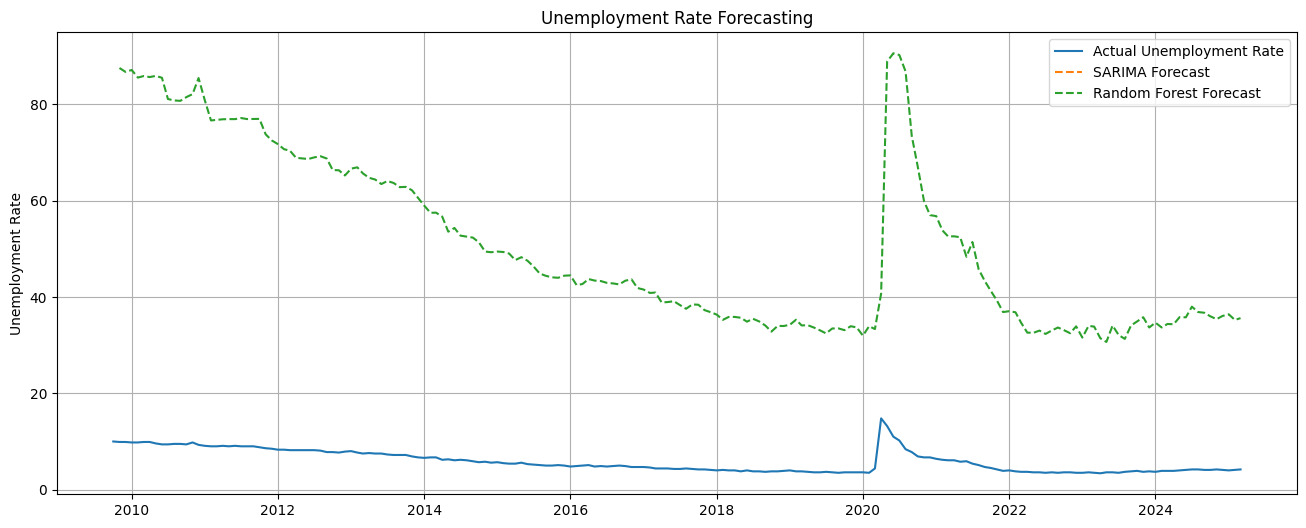


SARIMA Forecast for Unemployment Rate:
                 Unemployment_Rate_Forecast_SARIMA
observation_date                                  
2009-10-01                                     NaN
2009-11-01                                     NaN
2009-12-01                                     NaN
2010-01-01                                     NaN
2010-02-01                                     NaN
2010-03-01                                     NaN
2010-04-01                                     NaN
2010-05-01                                     NaN
2010-06-01                                     NaN
2010-07-01                                     NaN
2010-08-01                                     NaN
2010-09-01                                     NaN
2010-10-01                                     NaN
2010-11-01                                     NaN
2010-12-01                                     NaN
2011-01-01                                     NaN
2011-02-01                                

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Specify the path to your local CSV file
file_path = 'C:/Users/USER/Downloads/UNRATE.csv'  # Replace 'your_file_path.csv' with the actual path

try:
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')
    df.rename(columns={'UNRATE': 'Unemployment_Rate'}, inplace=True)
    df = df[['Unemployment_Rate']].dropna()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the file path is correct.")
    exit()

# Enable showing all rows and columns (optional)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the Unemployment Rates Dataset:")
print(df)

# Split data into training and testing sets
train_size = int(len(df) * 0.8)  # Adjust the split ratio as needed
train, test = df.iloc[:train_size], df.iloc[train_size:]

print("\nPerforming SARIMA on Unemployment Rate:")
# SARIMA for Unemployment Rate (univariate forecasting)
# You'll need to determine the (p, d, q)(P, D, Q, s) orders based on ACF, PACF, etc.
# The orders below are placeholders; analyze your data to find appropriate values.
order_sarima = (1, 1, 1)
seasonal_order_sarima = (1, 0, 0, 12)  # Assuming monthly data with yearly seasonality
model_sarima_unrate = SARIMAX(train['Unemployment_Rate'], order=order_sarima, seasonal_order=seasonal_order_sarima)
model_sarima_fit_unrate = model_sarima_unrate.fit(disp=False)
sarima_forecast_unrate = model_sarima_fit_unrate.forecast(steps=len(test))
sarima_forecast_unrate_df = pd.DataFrame(sarima_forecast_unrate, index=test.index, columns=['Unemployment_Rate_Forecast_SARIMA'])

print("\nPerforming Machine Learning (Random Forest) for Unemployment Rate:")
# Feature engineering: using lagged values as features
def create_lagged_features(data, lags=3):
    df_lagged = data.copy()
    for i in range(1, lags + 1):
        df_lagged[f'Unemployment_Rate_Lag_{i}'] = data['Unemployment_Rate'].shift(i)
    df_lagged = df_lagged.dropna()
    return df_lagged

df_lagged = create_lagged_features(df[['Unemployment_Rate']], lags=6) # Adjust lags as needed
train_ml, test_ml = df_lagged.iloc[:int(len(df_lagged) * 0.8)], df_lagged.iloc[int(len(df_lagged) * 0.8):]

X_train_ml = train_ml.drop('Unemployment_Rate', axis=1)
y_train_ml = train_ml['Unemployment_Rate']
X_test_ml = test_ml.drop('Unemployment_Rate', axis=1)
y_test_ml = test_ml['Unemployment_Rate']

scaler = MinMaxScaler()
X_train_scaled_ml = scaler.fit_transform(X_train_ml)
X_test_scaled_ml = scaler.transform(X_test_ml)

model_rf_unrate = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_unrate.fit(X_train_scaled_ml, y_train_ml)
rf_forecast_unrate_scaled = model_rf_unrate.predict(X_test_scaled_ml)
rf_forecast_unrate = scaler.inverse_transform(np.column_stack([rf_forecast_unrate_scaled] * X_train_ml.shape[1]))[:, 0]
rf_forecast_unrate_df = pd.DataFrame(index=test_ml.index, data=rf_forecast_unrate, columns=['Unemployment_Rate_Forecast_RF'])

# Visualization
plt.figure(figsize=(16, 6))
plt.plot(test.index, test['Unemployment_Rate'], label='Actual Unemployment Rate')
plt.plot(sarima_forecast_unrate_df.index, sarima_forecast_unrate_df['Unemployment_Rate_Forecast_SARIMA'], label='SARIMA Forecast', linestyle='--')
plt.plot(rf_forecast_unrate_df.index, rf_forecast_unrate_df['Unemployment_Rate_Forecast_RF'], label='Random Forest Forecast', linestyle='--')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Forecasting')
plt.legend()
plt.grid(True)
plt.show()

# Print Forecasts
print("\nSARIMA Forecast for Unemployment Rate:")
print(sarima_forecast_unrate_df)

print("\nRandom Forest Forecast for Unemployment Rate:")
print(rf_forecast_unrate_df)

print("\nRemember to complete the R part of the assignment and write your reflection comparing R and Python for advanced forecasting.")